# Project 8 - Artificial Neural Networks

In [4]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [5]:
!ls -lh

total 4.0M
-rw-r--r-- 1 root root 4.0M Dec 26 12:33 archive.zip
drwxr-xr-x 1 root root 4.0K Dec  9 14:42 sample_data


In [6]:
!unzip -q archive.zip
!ls

archive.zip  dataset  sample_data


In [7]:
!ls dataset

Beagle	Bulldog    German_Shepherd   Labrador_Retriever  Rottweiler
Boxer	Dachshund  Golden_Retriever  Poodle		 Yorkshire_Terrier


In [8]:
dataset_path = "dataset"

In [21]:
import os
import numpy as np
import PIL.Image
from sklearn.model_selection import train_test_split

seed = 42
dataset_path = "dataset"
image_size = (64, 64)

class_names = sorted(os.listdir(dataset_path))
class_ids = {name: i for i, name in enumerate(class_names)}

inputs, targets = [], []

for label in class_names:
    for fname in os.listdir(os.path.join(dataset_path, label)):
        img_path = os.path.join(dataset_path, label, fname)
        img = PIL.Image.open(img_path).convert("RGB").resize(image_size)
        inputs.append(np.array(img, dtype=np.float32))
        targets.append(class_ids[label])

inputs = np.stack(inputs) / 255.0
targets = np.array(targets)

x_train, x_test, y_train, y_test = train_test_split(
    inputs, targets,
    test_size=0.2,
    stratify=targets,
    random_state=seed
)

y_train = np.eye(len(class_names))[y_train]
y_test  = np.eye(len(class_names))[y_test]

Images are loaded in RGB format and resized to 64×64 to reduce computational cost. Each image is assigned a numerical class label based on its category.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    inputs,
    targets,
    test_size=0.2,
    stratify=targets,
    random_state=42
)

So here the input images are normalized by scaling pixel values to the range [0,1]. The dataset is split into training and test sets and labels are encoded using one-hot vectors.

In [22]:
import tensorflow as tf

mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

mlp.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,425,866 (24.51 MB)

 Trainable params: 6,425,866 (24.51 MB)

 Non-trainable params: 0 (0.00 B)

We flattened the input images to transform them into feature vectors.
We built a multilayer perceptron with fully connected layers for image classification.

In [23]:
mlp.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_mlp = mlp.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=30,
    batch_size=32)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.1279 - loss: 8.7182 - val_accuracy: 0.1031 - val_loss: 4.2347
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2296 - loss: 2.9683 - val_accuracy: 0.1907 - val_loss: 2.4878
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3057 - loss: 2.0526 - val_accuracy: 0.4485 - val_loss: 1.7349
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4619 - loss: 1.5677 - val_accuracy: 0.4072 - val_loss: 1.6748
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6167 - loss: 1.2862 - val_accuracy: 0.5928 - val_loss: 1.3671
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6823 - loss: 1.1139 - val_accuracy: 0.5722 - val_loss: 1.4277
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6609 - loss: 1.1039 - val_accuracy: 0.6392 - val_loss: 1.1055
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7213 - loss: 0.9129 - val_accuracy: 0.7062 - val_loss

We trained the MLP using the Adam optimizer and categorical crossentropy loss.
We observed a rapid increase in training accuracy over the epochs.

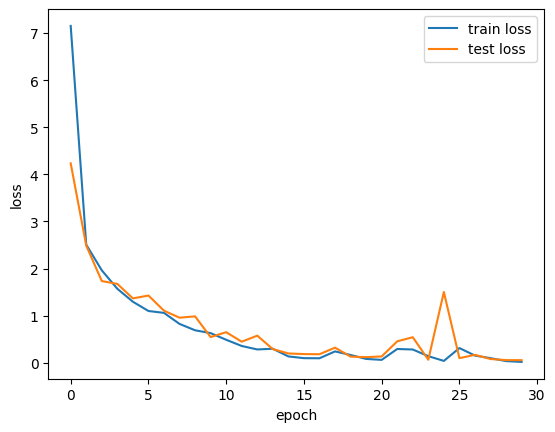

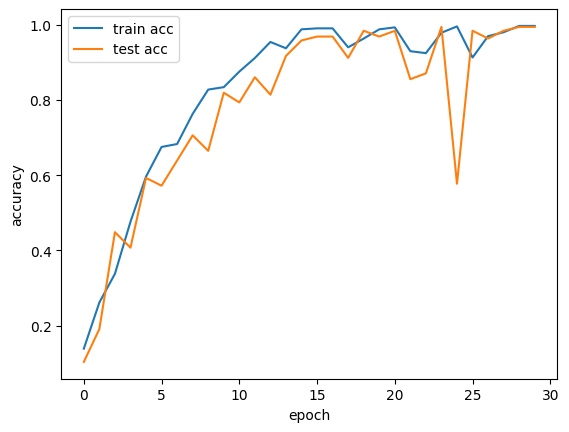

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history_mlp.history["loss"], label="train loss")
plt.plot(history_mlp.history["val_loss"], label="test loss")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

plt.figure()
plt.plot(history_mlp.history["accuracy"], label="train acc")
plt.plot(history_mlp.history["val_accuracy"], label="test acc")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

We observed that both training and validation loss decrease steadily over epochs, indicating effective learning. We noticed small fluctuations in validation accuracy, which may be caused by the limited size of the test set.

In [27]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,442 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

We built a convolutional neural network to extract spatial features from images.
We reduced the number of parameters compared to the MLP by using convolutional layers.

In [28]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_cnn = cnn.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=30,
    batch_size=32)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.1431 - loss: 2.3795 - val_accuracy: 0.2784 - val_loss: 2.0463
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4416 - loss: 1.7787 - val_accuracy: 0.6546 - val_loss: 1.1862
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7840 - loss: 0.8046 - val_accuracy: 0.9227 - val_loss: 0.3947
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9750 - loss: 0.1961 - val_accuracy: 0.9897 - val_loss: 0.1180
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9991 - loss: 0.0437 - val_accuracy: 0.9948 - val_loss: 0.0639
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9976 - loss: 0.0219 - val_accuracy: 0.9948 - val_loss: 0.0286
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.9948 - val_loss: 0.0280
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9948 - val_

We trained the CNN using the Adam optimizer and categorical crossentropy loss.
We observed that the CNN converges very quickly and achieves high validation accuracy after few epochs.

In [31]:
test_loss, test_accuracy = cnn.evaluate(x_test, y_test)
print(test_loss, test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9930 - loss: 0.0505     
0.037460215389728546 0.9948453903198242


We evaluated the trained CNN on the test set to measure its generalization performance. The model achieves very high test accuracy (99.48%), indicating effective learning.

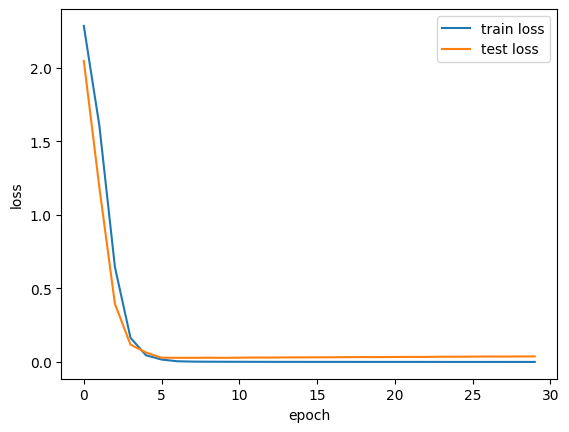

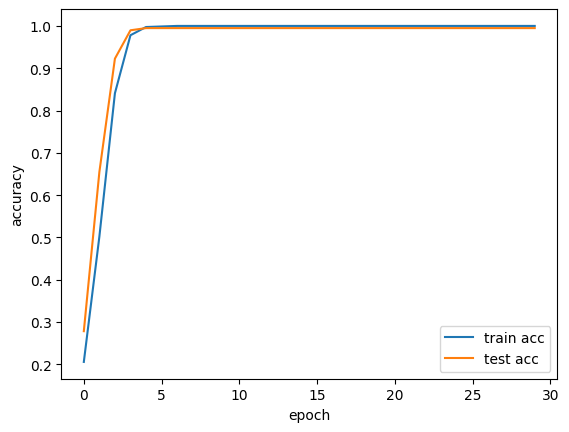

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history_cnn.history["loss"], label="train loss")
plt.plot(history_cnn.history["val_loss"], label="test loss")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

plt.figure()
plt.plot(history_cnn.history["accuracy"], label="train acc")
plt.plot(history_cnn.history["val_accuracy"], label="test acc")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

We observed that training loss decreases rapidly and approaches zero.
Validation accuracy remains high and stable across epochs, indicating good generalization.

We observed that the MLP achieves very high accuracy but requires a significantly larger number of trainable parameters.
The CNN provides comparable performance with fewer parameters, making it more efficient and better suited for image classification.

In [32]:
cnn_improved = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

cnn_improved.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_cnn_improved = cnn_improved.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=30,
    batch_size=32)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.2543 - loss: 4.2130 - val_accuracy: 0.1237 - val_loss: 2.2575
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5848 - loss: 1.1788 - val_accuracy: 0.2938 - val_loss: 2.3323
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7322 - loss: 0.7557 - val_accuracy: 0.1031 - val_loss: 5.6892
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7770 - loss: 0.6168 - val_accuracy: 0.1186 - val_loss: 7.3948
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8182 - loss: 0.4841 - val_accuracy: 0.1392 - val_loss: 9.1570
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8668 - loss: 0.3775 - val_accuracy: 0.1907 - val_loss: 10.7642
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8979 - loss: 0.3341 - val_accuracy: 0.2165 - val_loss: 9.0117
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9179 - loss: 0.2227 - val_accuracy: 0.1701 - v

Last but not least, from the above we observed unstable validation accuracy during the early training epochs.
After several epochs though validation performance improves significantly and remains high.